In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import  datetime
import time
%matplotlib inline

#### Extract Information from CIFAR10 Dataset 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 

There are 50000 training images and 10000 test images.

CIFAR-10 Dataset [CIFAR10-Toronto](https://www.cs.toronto.edu/~kriz/cifar.html)

In [2]:
!ls -l data/*

-rw-r--r-- 1 ecbm4040 ecbm4040 170498071 Nov 29 04:13 data/cifar-10-python.tar.gz

data/cifar-10-batches-py:
total 181876
-rw-r--r-- 1 ecbm4040 ecbm4040      158 Mar 31  2009 batches.meta
-rw-r--r-- 1 ecbm4040 ecbm4040 31035704 Mar 31  2009 data_batch_1
-rw-r--r-- 1 ecbm4040 ecbm4040 31035320 Mar 31  2009 data_batch_2
-rw-r--r-- 1 ecbm4040 ecbm4040 31035999 Mar 31  2009 data_batch_3
-rw-r--r-- 1 ecbm4040 ecbm4040 31035696 Mar 31  2009 data_batch_4
-rw-r--r-- 1 ecbm4040 ecbm4040 31035623 Mar 31  2009 data_batch_5
-rw-r--r-- 1 ecbm4040 ecbm4040       88 Jun  4  2009 readme.html
-rw-r--r-- 1 ecbm4040 ecbm4040 31035526 Mar 31  2009 test_batch


In [3]:
# Unpickle Function from toronto 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# Unpickling Training Data Batches
data_batch_1 = unpickle("data/cifar-10-batches-py/data_batch_1")
data_batch_2 = unpickle("data/cifar-10-batches-py/data_batch_2")
data_batch_3 = unpickle("data/cifar-10-batches-py/data_batch_3")
data_batch_4 = unpickle("data/cifar-10-batches-py/data_batch_4")
data_batch_5 = unpickle("data/cifar-10-batches-py/data_batch_5")

# Extracting Training Images 
Training_Images = data_batch_1[b'data']
Training_Images = np.vstack((Training_Images,data_batch_2[b'data']))
Training_Images = np.vstack((Training_Images,data_batch_3[b'data']))
Training_Images = np.vstack((Training_Images,data_batch_4[b'data']))
Training_Images = np.vstack((Training_Images,data_batch_5[b'data']))

# Extracting Training Labels
Training_Labels = data_batch_1[b'labels']
Training_Labels = np.hstack((Training_Labels,data_batch_2[b'labels']))
Training_Labels = np.hstack((Training_Labels,data_batch_3[b'labels']))
Training_Labels = np.hstack((Training_Labels,data_batch_4[b'labels']))
Training_Labels = np.hstack((Training_Labels,data_batch_5[b'labels']))

# Extracting Test Data 
test_batch = unpickle("data/cifar-10-batches-py/test_batch")

# Extracting Test Images
Test_Images = test_batch[b'data']

# Extracting Test Labels
Test_Labels = np.array(test_batch[b'labels'])

# Getting Labels List
batches_meta = unpickle("data/cifar-10-batches-py/batches.meta")

CIFAR10_LABELS = batches_meta[b'label_names']
CIFAR10_LABELS = [ x.decode('ascii') for x in CIFAR10_LABELS ]

In [5]:
print("-------------------------------------------------")
print("Extraction of CIFAR10 Dataset Done")
print(f"Shape of Training Images : {Training_Images.shape}")
print(f"Shape of Training Labels : {Training_Labels.shape}")
print(f"Shape of Test Images     : {Test_Images.shape}")
print(f"Shape of Test Labels     : {Test_Labels.shape}")
print("-------------------------------------------------")

-------------------------------------------------
Extraction of CIFAR10 Dataset Done
Shape of Training Images : (50000, 3072)
Shape of Training Labels : (50000,)
Shape of Test Images     : (10000, 3072)
Shape of Test Labels     : (10000,)
-------------------------------------------------


In [6]:
print(f"Labels in CIFAR10 Dataset are \n{CIFAR10_LABELS}")

Labels in CIFAR10 Dataset are 
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### Preprocess Images 

In [7]:
# Reshape Images into RGB Channels 

# Set Image Shape 
Pixel_shape = 32
Channel = 3 

Training_Images = np.reshape(Training_Images, (50000,Channel,Pixel_shape, Pixel_shape))
Training_Images = Training_Images.transpose(0, 2, 3, 1)

Test_Images = np.reshape(Test_Images, (10000, Channel,Pixel_shape, Pixel_shape))
Test_Images = Test_Images.transpose(0, 2, 3, 1)

In [8]:
# plt.imshow(Test_Images[1])
Training_Images[1].shape

(32, 32, 3)

#### Plotting Images from Training Images 

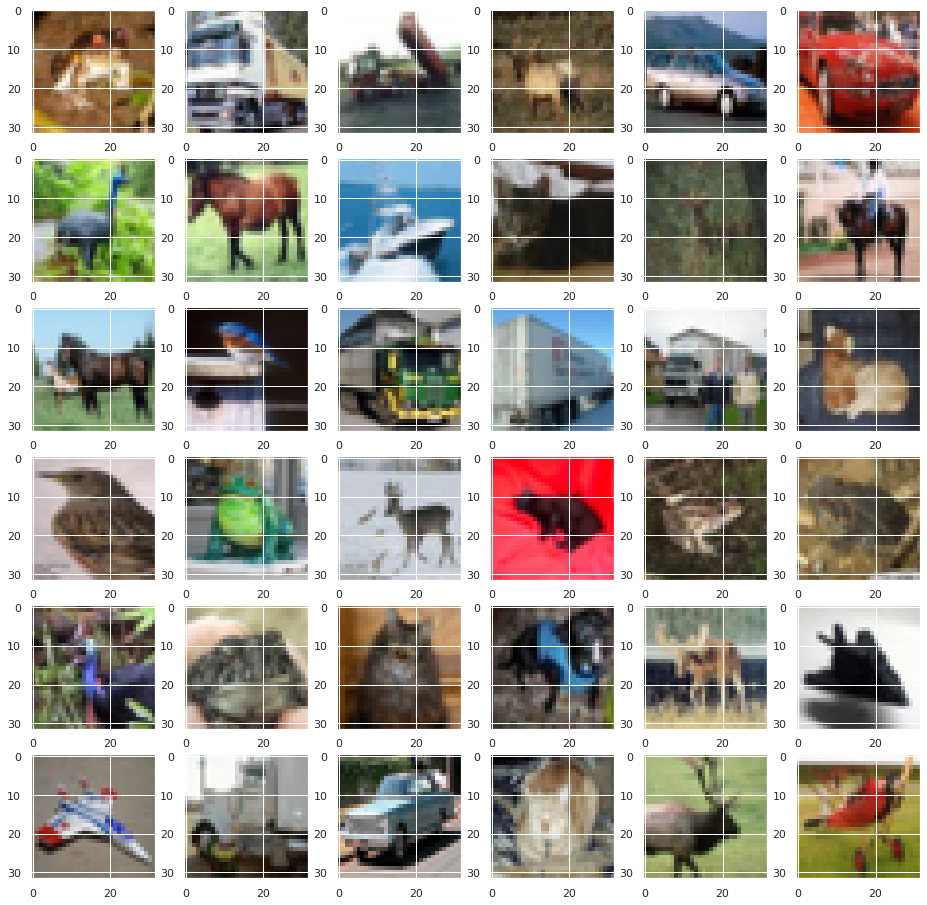

In [9]:
fig, ax = plt.subplots(6, 6,figsize=(16,16))

k = 0 

for i in range(6):
    for j in range(6):
        ax[i][j].imshow(Training_Images[k])
        k += 1

plt.show()

In [10]:
# Pre-Process Training Images and Test Images 

Training_Images = Training_Images/255.0

Test_Images = Test_Images/255.0

#### Split Training Images into Training and Validation 

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(Training_Images,Training_Labels,test_size=0.1)

In [12]:
print("-------------------------------------------------")
print("Training and Validation Split")
print(f"Shape of Training Images   :  {X_train.shape}")
print(f"Shape of Validation Images : {X_val.shape}")
print(f"Shape of Training Labels   : {y_train.shape}")
print(f"Shape of Validation Labels : {y_val.shape}")
print("-------------------------------------------------")

-------------------------------------------------
Training and Validation Split
Shape of Training Images   :  (45000, 32, 32, 3)
Shape of Validation Images : (5000, 32, 32, 3)
Shape of Training Labels   : (45000,)
Shape of Validation Labels : (5000,)
-------------------------------------------------


#### Build CNN Model

In [13]:
# Hyperparameter Initialization 
Epoch_Number = 30 
Batch_Size = 64
Model_Name = f"CIFAR10-Model-{time.time()}"
Model_Name

'CIFAR10-Model-1638208440.8432934'

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,BatchNormalization,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

CIFAR10_Model = Sequential()

CIFAR10_Model.add(Conv2D(filters =64 , kernel_size = (3,3),padding="valid",activation = "relu",input_shape=(32,32,3)))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Conv2D(filters =128 , kernel_size = (3,3),padding="valid",activation = "relu",kernel_regularizer=l2(0.01)))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Conv2D(filters =256 , kernel_size = (3,3),padding="valid",activation = "relu", kernel_regularizer=l2(0.01)))
CIFAR10_Model.add(MaxPool2D(pool_size=(2, 2)))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Conv2D(filters =512 , kernel_size = (3,3),padding="valid",activation = "relu", kernel_regularizer=l2(0.01)))
CIFAR10_Model.add(MaxPool2D(pool_size=(2, 2)))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Flatten())

CIFAR10_Model.add(Dense(256,activation="relu",kernel_regularizer='l2'))
CIFAR10_Model.add(Dropout(0.2))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Dense(128,activation="relu",kernel_regularizer='l2'))
CIFAR10_Model.add(Dropout(0.2))
CIFAR10_Model.add(BatchNormalization())

CIFAR10_Model.add(Dense(64,activation="tanh",kernel_regularizer='l2'))
CIFAR10_Model.add(Dropout(0.2))

CIFAR10_Model.add(Dense(10,activation="softmax"))

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f"./logs/{Model_Name}")

CIFAR10_Model.compile(
                  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), 
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics = ["accuracy"])

CIFAR10_Model.fit(
                    X_train, y_train, 
                    epochs = Epoch_Number, 
                    batch_size = Batch_Size,
                    validation_data = (X_val,y_val),                
                    callbacks=[tensorboard_callback], 
                )

Epoch 1/30
704/704 [==============================] - 61s 45ms/step - loss: 13.9695 - accuracy: 0.3741 - val_loss: 9.2423 - val_accuracy: 0.5934
Epoch 2/30
704/704 [==============================] - 23s 33ms/step - loss: 8.2464 - accuracy: 0.5918 - val_loss: 5.5744 - val_accuracy: 0.6552
Epoch 3/30
704/704 [==============================] - 23s 32ms/step - loss: 5.0290 - accuracy: 0.6699 - val_loss: 3.6918 - val_accuracy: 0.6878
Epoch 4/30
704/704 [==============================] - 22s 32ms/step - loss: 3.3924 - accuracy: 0.7083 - val_loss: 2.7002 - val_accuracy: 0.7236
Epoch 5/30
704/704 [==============================] - 23s 32ms/step - loss: 2.4755 - accuracy: 0.7553 - val_loss: 2.1811 - val_accuracy: 0.7332
Epoch 6/30
704/704 [==============================] - 23s 32ms/step - loss: 1.9806 - accuracy: 0.7809 - val_loss: 1.8735 - val_accuracy: 0.7534
Epoch 7/30
704/704 [==============================] - 23s 32ms/step - loss: 1.6916 - accuracy: 0.7990 - val_loss: 1.7077 - val_accuracy

In [16]:
%load_ext tensorboard
%tensorboard --logdir logs/ --bind_all

In [24]:
CIFAR10_Model.evaluate(Test_Images,Test_Labels)

313/313 [==============================] - 3s 7ms/step - loss: 1.6431 - accuracy: 0.7763


[1.643134593963623, 0.7763000130653381]

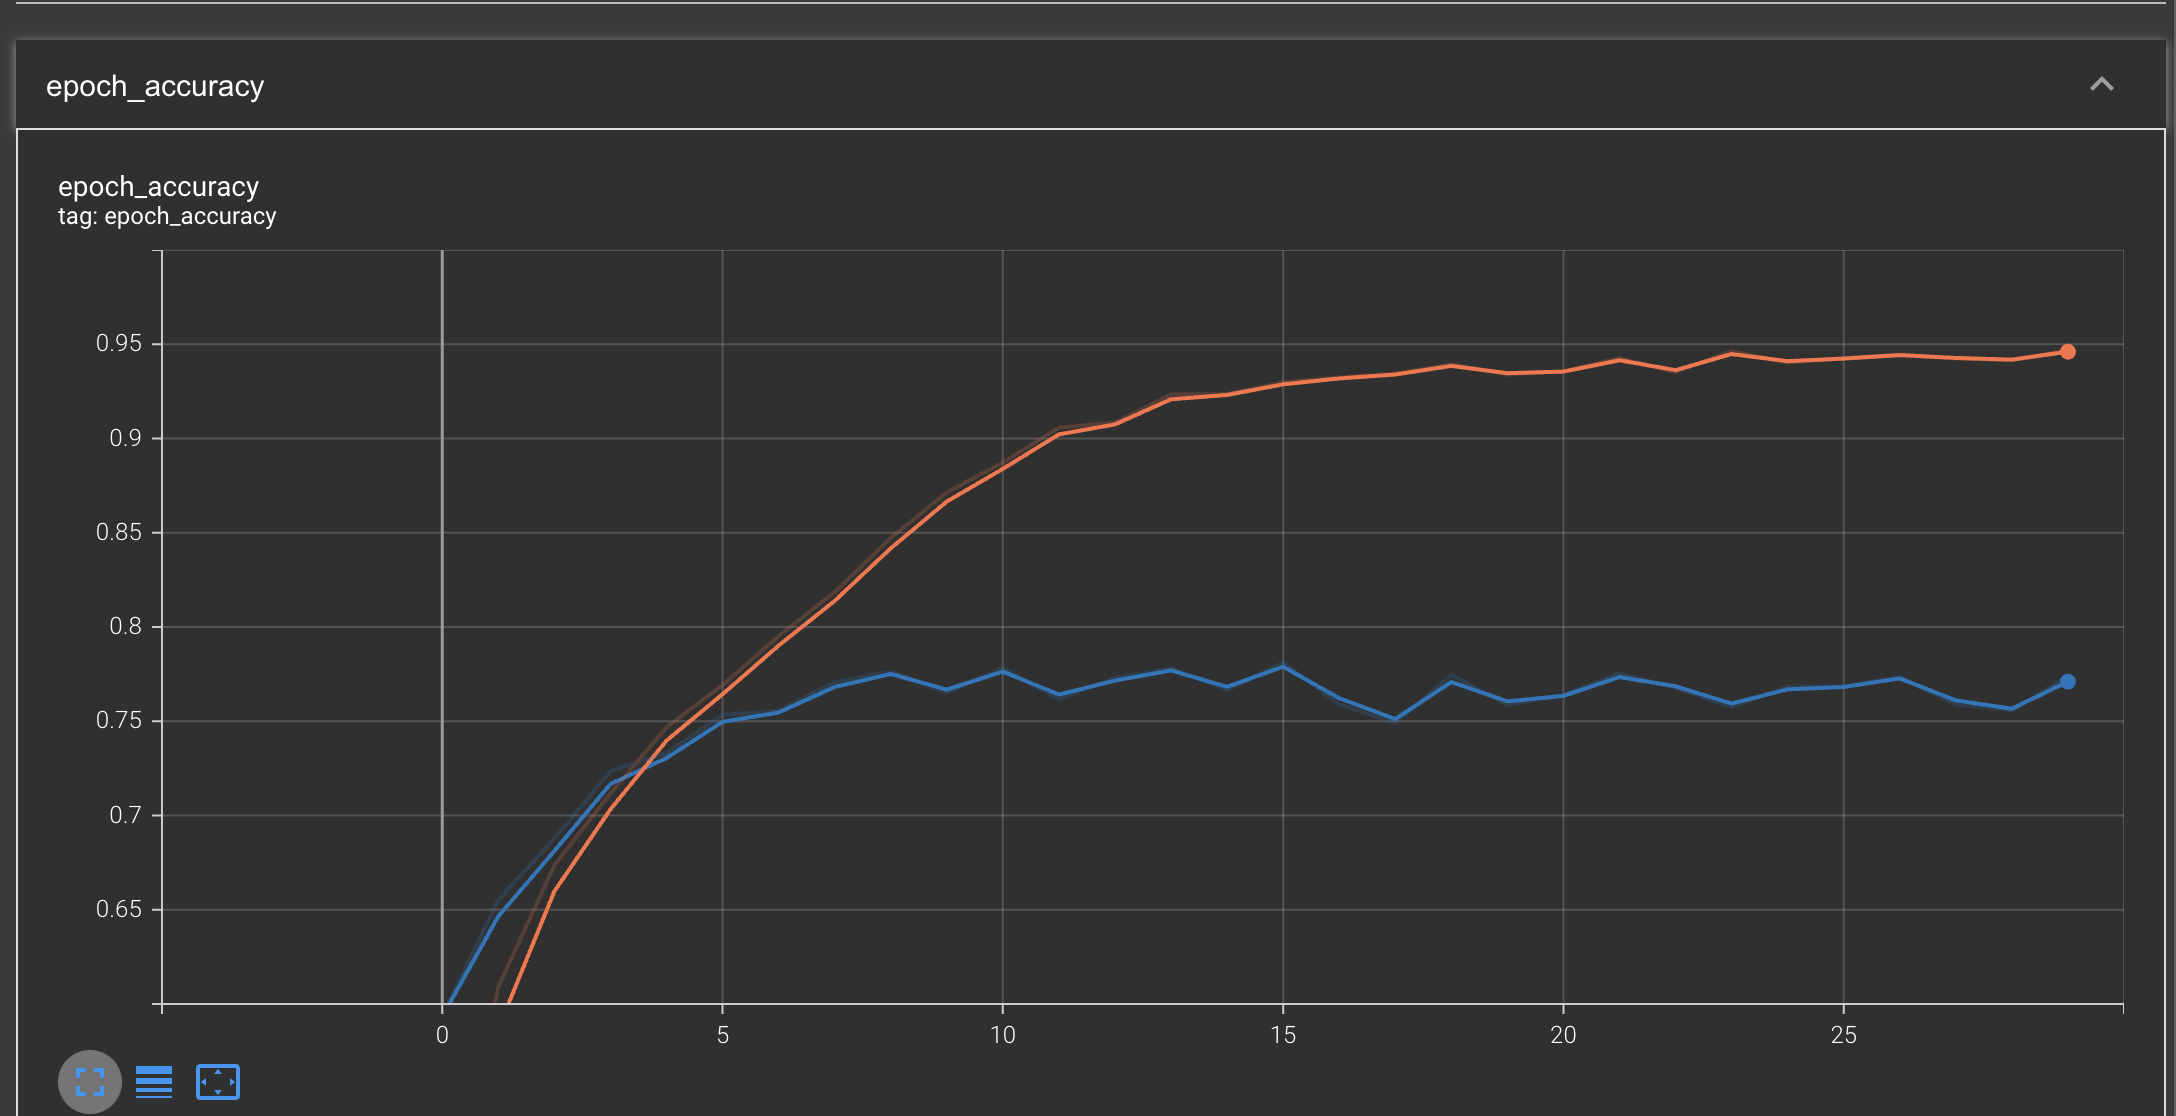

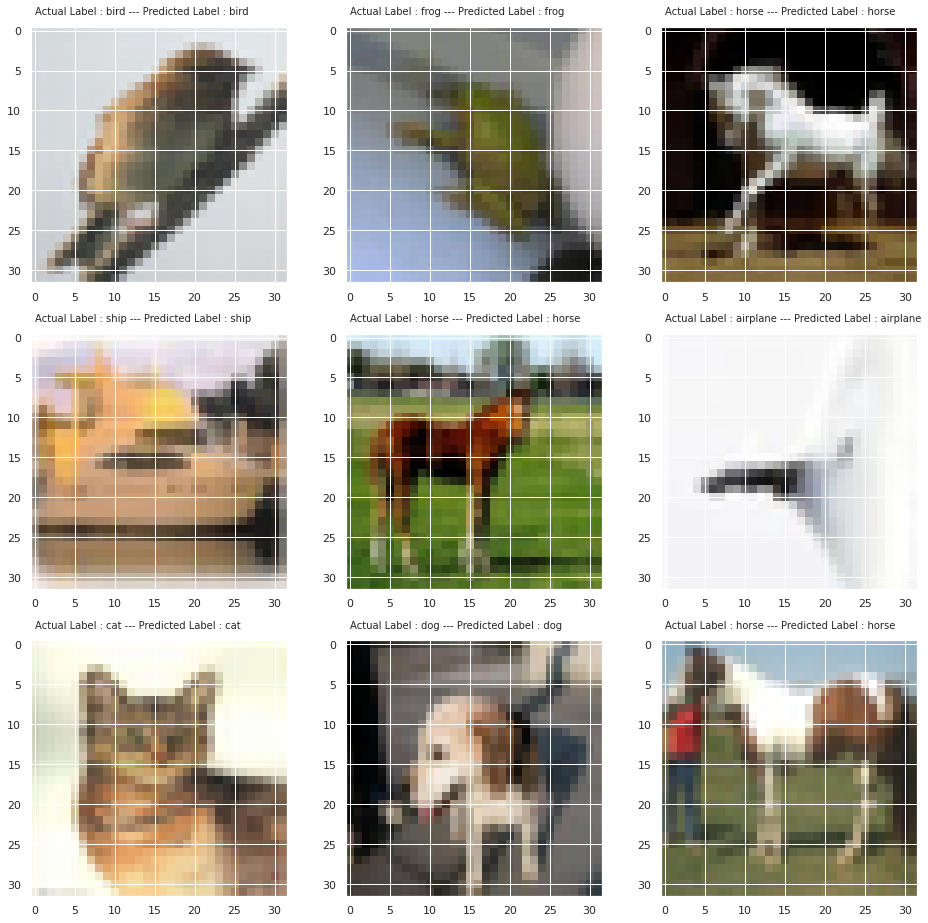

In [56]:
fig, ax = plt.subplots(3, 3,figsize=(16,16))


for i in range(3):
    for j in range(3):
        k = np.random.randint(0,10000)
        ax[i][j].imshow(Test_Images[k])
        ax[i][j].text(0,-2,"Actual Label : "+CIFAR10_LABELS[Test_Labels[k]] + " --- Predicted Label : "+CIFAR10_LABELS[CIFAR10_Model.predict(Test_Images[k:k+1]).argmax()])
        

plt.show()
